<div style="background-image: linear-gradient(to right, #4b4cff , #00d4ff); text-align: center; padding: 50px;">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 48px; color: white; text-shadow: 2px 2px #4b4cff;">
    Animal recognition
  </h1>
</div>

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Library
</h2>

In [9]:
import os

from PIL import Image
import IPython.display as display
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

import cv2

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Data
</h2>

In [2]:
train_gen= ImageDataGenerator(rescale=1./255)

train_data=train_gen.flow_from_directory('data/train/',target_size=(64,64),batch_size=32,class_mode='categorical',shuffle=True)

Found 14630 images belonging to 3 classes.


In [3]:
val_gen= ImageDataGenerator(rescale=1./255)

val_data=val_gen.flow_from_directory('data/val/',target_size=(64,64),batch_size=1,class_mode='categorical',shuffle=False)

Found 1500 images belonging to 3 classes.


In [4]:
train_data.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Model Creation
</h2>

In [14]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten

model = Sequential()

model.add(Flatten(input_shape=(64,64,3)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()
model.save('model.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 12288)             0         
                                                                 
 dense_9 (Dense)             (None, 4)                 49156     
                                                                 
 dense_10 (Dense)            (None, 5)                 25        
                                                                 
 dense_11 (Dense)            (None, 3)                 18        
                                                                 
Total params: 49,199
Trainable params: 49,199
Non-trainable params: 0
_________________________________________________________________


In [15]:
import netron

netron.start('model.h5')

Serving 'model.h5' at http://localhost:8080


('localhost', 8080)

Flatten allows us to transform the picture into a 12 288 dimension vector. Then the first Dense layer reduce the space dimension. The 'dense_1' layer increase the complexity of the model in order to find more complex relation. And then the last layer produce probability for all the 3 classes and the sum on this 3 is 1. 

In [6]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics='accuracy')

The **model.compile** sets up the training parameters. **loss = 'categorical_crossentropy'** indicate the loss fonction and it's use for multi-class classification. I'm using the **optimizer = 'adam'** to adjust model's weight. And we use the **metrics='accuracy'**.

In [12]:
model.fit(train_data,epochs=5)

Epoch 1/5
458/458 [==============================] - 64s 140ms/step - loss: 0.9265 - accuracy: 0.5505
Epoch 2/5
458/458 [==============================] - 53s 116ms/step - loss: 0.8916 - accuracy: 0.5597
Epoch 3/5
458/458 [==============================] - 66s 145ms/step - loss: 0.8704 - accuracy: 0.5660
Epoch 4/5
458/458 [==============================] - 74s 162ms/step - loss: 0.8610 - accuracy: 0.5655
Epoch 5/5
458/458 [==============================] - 54s 117ms/step - loss: 0.8523 - accuracy: 0.5717


We fit our model on training_data. With 5 epochs.

In [13]:
pred=model.predict(val_data).argmax(axis=1)

1500/1500 [==============================] - 13s 8ms/step


<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Test
</h2>

<h3 style="color: white; font-size: 24px; font-family: Arial, sans-serif; font-weight: bold; text-align: center; text-transform: uppercase; margin-bottom: 20px;">Dog</h3>

In [14]:
import cv2

img = cv2.imread ('data/val/dog/pixabay_dog_000471.jpg')
img= cv2.resize(img,(64,64))
img= img/255
img=img.reshape(-1,64,64,3)

model.predict(img).argmax(axis=1)

1/1 [==============================] - 0s 75ms/step


array([1], dtype=int64)

1/1 [==============================] - 0s 40ms/step


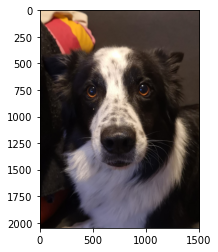

Image 1 shows a dog.
1/1 [==============================] - 0s 45ms/step


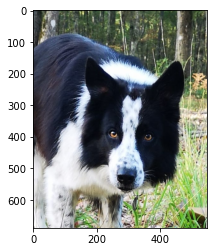

Image 2 shows a dog.
1/1 [==============================] - 0s 40ms/step


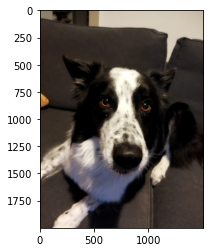

Image 3 shows a dog.


In [15]:
for i in range(1,4) : 
    img = cv2.imread (f'koda/koda_{i}.jpg')
    img= cv2.resize(img,(64,64))
    img= img/255
    img=img.reshape(-1,64,64,3)

    pred = model.predict(img).argmax(axis=1)

    img_disp = plt.imread(f'koda/koda_{i}.jpg')

    plt.imshow(img_disp)
    plt.show()
    
    if  pred == 0:
        print(f"Image {i} shows a cat.")
    elif pred == 1:
        print(f"Image {i} shows a dog.")
    elif pred == 2:
        print(f"Image {i} shows a wild animal.")

<h3 style="color: white; font-size: 24px; font-family: Arial, sans-serif; font-weight: bold; text-align: center; text-transform: uppercase; margin-bottom: 20px;">Cat</h3>

1/1 [==============================] - 0s 43ms/step


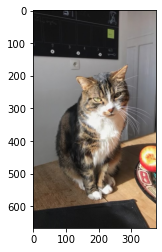

Image 1 shows a dog.
1/1 [==============================] - 0s 79ms/step


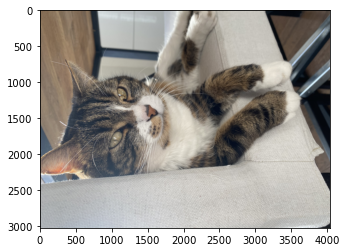

Image 2 shows a cat.
1/1 [==============================] - 0s 56ms/step


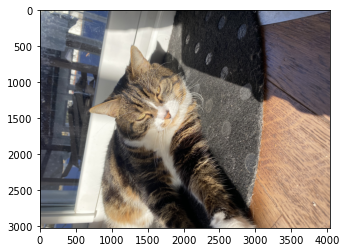

Image 3 shows a cat.


In [16]:
for i in range(1,4) : 
    img = cv2.imread (f'zanzan/zanzan_{i}.jpg')
    img= cv2.resize(img,(64,64))
    img= img/255
    img=img.reshape(-1,64,64,3)

    pred = model.predict(img).argmax(axis=1)

    img_disp = plt.imread(f'zanzan/zanzan_{i}.jpg')

    plt.imshow(img_disp)
    plt.show()
    
    if  pred == 0:
        print(f"Image {i} shows a cat.")
    elif pred == 1:
        print(f"Image {i} shows a dog.")
    elif pred == 2:
        print(f"Image {i} shows a wild animal.")

The model is having hard time with those cats pictures, however he do pretty well on dogs. Maybe more epochs will help him.